# Описание

В данном ноутбуке будет представлена модель машинного обучения, служащая для предсказания принадлежности пассажиров Титаника с одному из двух классов - выжившие или погибшие. Модель построена с использованием пайплайна.

# Импорт библиотек и просмотр данных 

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [72]:
np.set_printoptions(linewidth=100)

In [73]:
train = pd.read_csv(r'C:\Users\Максим\Desktop\Аналитика данных\Datasets\titanic\train.csv')
test = pd.read_csv(r'C:\Users\Максим\Desktop\Аналитика данных\Datasets\titanic\test.csv')
submission = pd.read_csv(r'C:\Users\Максим\Desktop\Аналитика данных\Datasets\titanic\gender_submission.csv')

In [74]:
cols = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

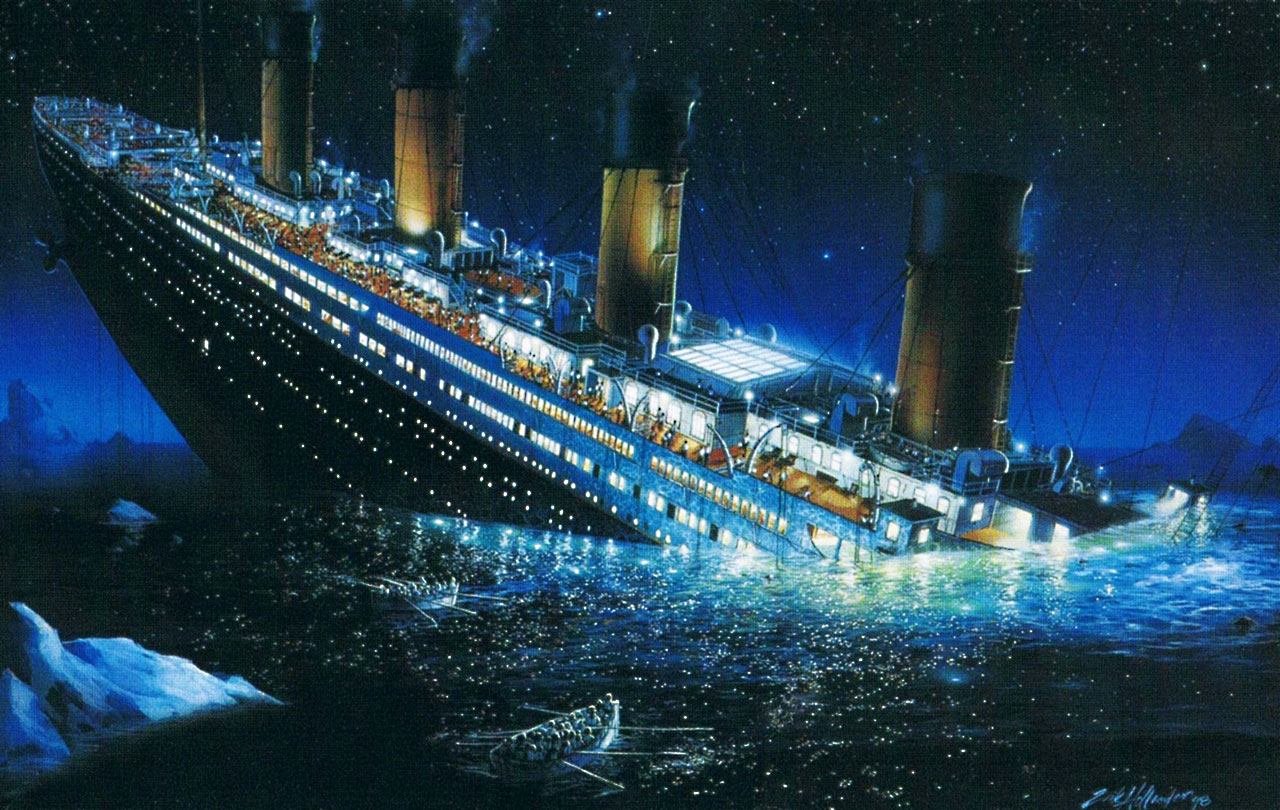

In [75]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [77]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [78]:
train.shape, test.shape

((891, 12), (418, 11))

In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [80]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


PassengerId — идентификатор пассажира <br>
Survival — поле в котором указано спасся человек (1) или нет (0) <br>
Pclass — содержит социально-экономический статус: <br>
   высокий <br>
   средний <br>
   низкий <br>
Name — имя пассажира <br>
Sex — пол пассажира <br>
Age — возраст <br>
SibSp — содержит информацию о количестве родственников 2-го порядка (муж, жена, братья, сетры) <br>
Parch — содержит информацию о количестве родственников на борту 1-го порядка (мать, отец, дети) <br>
Ticket — номер билета <br>
Fare — цена билета <br>
Cabin — каюта <br>
Embarked — порт посадки <br>
   C — Cherbourg <br>
   Q — Queenstown <br>
   S — Southampton


In [81]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [82]:
round(100*train['Survived'].value_counts(normalize=True), 2)

0    61.62
1    38.38
Name: Survived, dtype: float64

Классы хоть и не совсем сбалансированы, но это не критично.

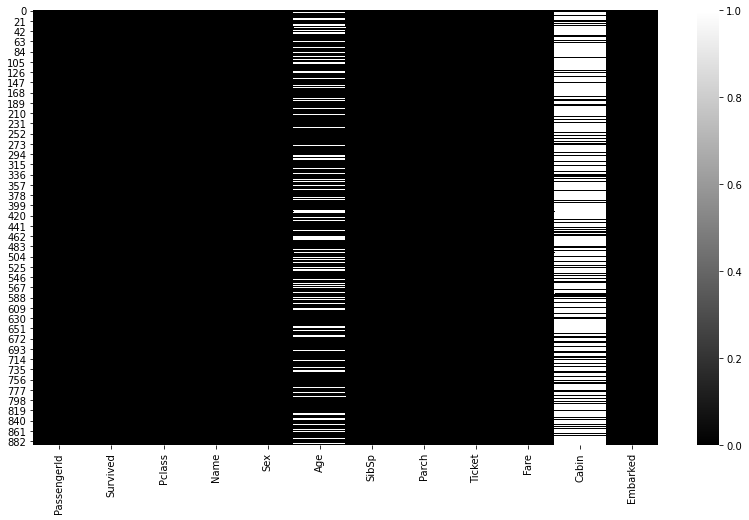

In [83]:
# Визуализируем пропущенные значения

plt.figure(figsize=(14, 8))
sns.heatmap(train.isnull(), cmap='binary_r');

Больше всего пропущенных значений содержится в столбце cabin, этим столбцом можно пренебречь.

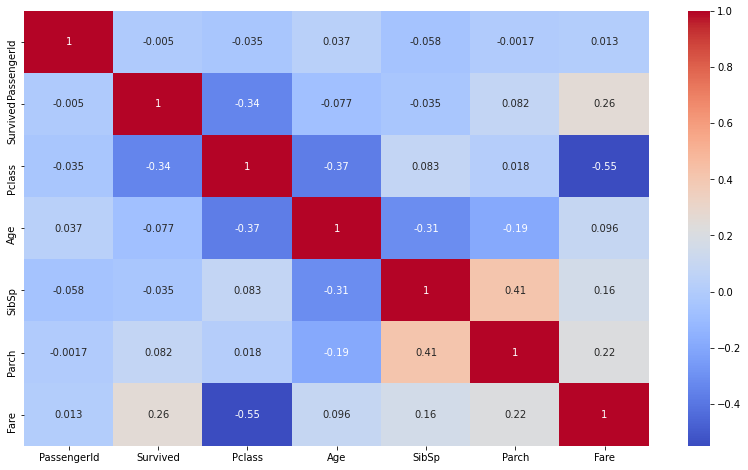

In [84]:
# Корреляции

plt.figure(figsize=(14, 8))
sns.heatmap(train.corr(),
                annot=True, 
                cmap = "coolwarm");

По матрице корреляций можно заметить, что чем выше номер класса, тем меньше вероятность выжить. 

# Предобработка

In [85]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV, cross_val_score, RepeatedStratifiedKFold, RandomizedSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix

In [86]:
X_train = train.drop(columns='Survived')
y_train = train['Survived']
X_test = test
y_test = submission['Survived']

In [87]:
X_train.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [88]:
numeric_features = ['Age', 'Fare'] 
categorical_features = ['Sex', 'Embarked', 'Pclass']
name_feature = ['Name']
family_features = ['SibSp', 'Parch']

In [89]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
simp = SimpleImputer(strategy='most_frequent')
kimp = KNNImputer()
scaler = StandardScaler()

## Трансформер для числовых и категориальных данных

In [90]:
num_pipe = Pipeline([
    ('imputer', kimp),
    ('scaler', scaler)
])

cat_pipe = Pipeline([
    ('imputer', simp),
    ('onehot', ohe)
])

## Пользовательские трансформеры

In [91]:
class TitleExtractor(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
        
    def fit(self, X, y=None):
        return self   
    
    def transform(self, X):
        Title_Dictionary = {
                "Capt": "Officer", "Col": "Officer", "Major": "Officer","Jonkheer": "Royalty",
                "Don": "Royalty","Sir" : "Royalty","Dr": "Officer","Rev": "Officer","the Countess":"Royalty",
                "Mme": "Mrs", "Mlle": "Miss", "Ms": "Mrs", "Mr" : "Mr", "Mrs" : "Mrs", "Miss" : "Miss",
                "Master" : "Master", "Lady" : "Royalty"}
        
        X['Title'] = X['Name'].str.extract(' ([A-Za-z]+)\.', expand=False).map(Title_Dictionary)
        X.drop('Name', axis=1, inplace=True)
        
#         titles_dummies = pd.get_dummies(X['Title'], prefix='Title')
#         X = pd.concat([X, titles_dummies], axis=1)
        
        titles = ohe.fit_transform(X[['Title']])
    
        X.drop('Title', axis=1, inplace=True)
        
        return X.values

In [92]:
class FamilySizeCounter(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
        
    def fit(self, X, y=None):
        return self     
    
    def transform(self, X, y=None):
        X['family_size'] = X['SibSp'] + X['Parch'] + 1
        X.drop(['SibSp', 'Parch'], axis=1, inplace=True)
        
        return X.values

## Полный пайплайн предобработки

In [93]:
transformer = ColumnTransformer([
    ('num_preprocessing', num_pipe, numeric_features),
    ('cat_preprocessing', cat_pipe, categorical_features),
    ('name_preprocessing', TitleExtractor(), name_feature),
    ('family_size', FamilySizeCounter(), family_features)
])

In [94]:
new_X = X_train.copy()
new_y = y_train.copy()
new_test = X_test.copy()

In [95]:
transformer.fit(new_X, new_y)
pd.DataFrame(transformer.transform(new_X))

,0,1,2,3,4,5,6,7,8,9,10
0,-0.572142,-0.502445,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0
1,0.626331,0.786845,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0
2,-0.272524,-0.488854,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0.401618,0.420730,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0
4,0.401618,-0.486337,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,-0.197619,-0.386671,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
887,-0.796856,-0.044381,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
888,-0.122715,-0.176263,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0
889,-0.272524,-0.044381,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


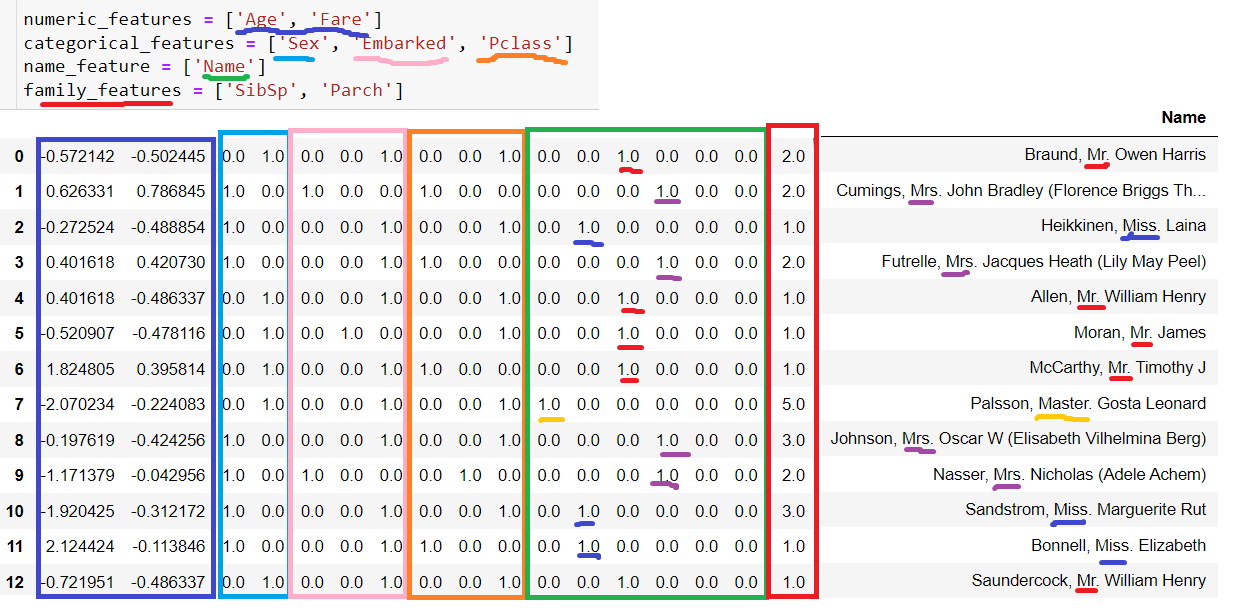

# Модель

## Объявляем модели и функции

In [96]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
svc = SVC(random_state=42, class_weight='balanced')
lr = LogisticRegression(random_state=42, class_weight='balanced')
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=42, class_weight='balanced')

In [97]:
def make_cf_matrix(transformer, classifier):
    pipe = Pipeline([
        ('transformer', transformer),
        ('clf', classifier)
    ])

    pipe.fit(X_train, y_train)
    
    plt.figure(figsize=(7,5))
    cf_matrix = confusion_matrix(y_test, pipe.predict(X_test))
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.title(f'Матрица ошибок для {classifier}')
    return sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');

In [98]:
classifiers = [rf, svc, lr, knn, tree]

In [99]:
# Объединяем данные о метриках для разных моделей

report_df = []

for clf in classifiers:
    pipe = Pipeline([('transformer', transformer), ('clf', clf)])
    pipe.fit(X_train, y_train)
    
    report = classification_report(y_test, pipe.predict(X_test), output_dict=True)
    report_df.append(report)

class_0_metrics = []
class_1_metrics = []

for d in report_df:
    if list(d.keys())[0]=='0':
        class_0_metrics.append(d.get('0').values())
        
    if list(d.keys())[1]=='1':
        class_1_metrics.append(d.get('1').values())
    
    
class_0_metrics_df = pd.DataFrame(class_0_metrics, 
             columns=['precision', 'recall', 'f1-score', 'support'], 
             index=['RF', 'SVC', 'LR', 'KNN', 'Tree'])

class_1_metrics_df = pd.DataFrame(class_1_metrics, 
             columns=['precision', 'recall', 'f1-score', 'support'], 
             index=['RF', 'SVC', 'LR', 'KNN', 'Tree'])

In [100]:
class_0_metrics_df

,precision,recall,f1-score,support
RF,0.863469,0.879699,0.871508,266
SVC,0.972763,0.939850,0.956023,266
LR,0.978992,0.875940,0.924603,266
KNN,0.896552,0.879699,0.888046,266
Tree,0.860000,0.808271,0.833333,266


In [101]:
class_1_metrics_df

,precision,recall,f1-score,support
RF,0.782313,0.756579,0.769231,152
SVC,0.900621,0.953947,0.926518,152
LR,0.816667,0.967105,0.885542,152
KNN,0.796178,0.822368,0.809061,152
Tree,0.696429,0.769737,0.731250,152


## Оценка метрик

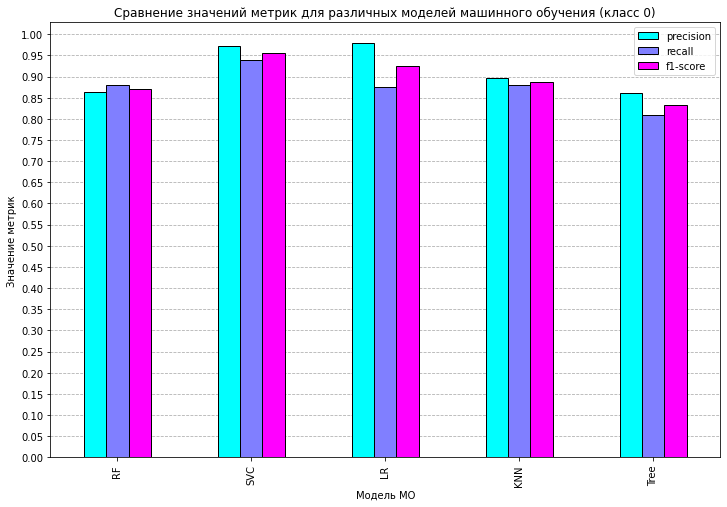

In [102]:
ax = class_0_metrics_df.iloc[:, :-1].plot(kind='bar', 
                                     figsize=(12, 8), colormap='cool', 
                                     ec='k', zorder=2,
                                     yticks=np.arange(0, 1.05, 0.05),
                                     ylabel='Значение метрик', xlabel='Модель МО',
                                     title='Сравнение значений метрик для различных моделей машинного обучения (класс 0)',
                                     );
ax.grid("on", axis="y", ls='--')

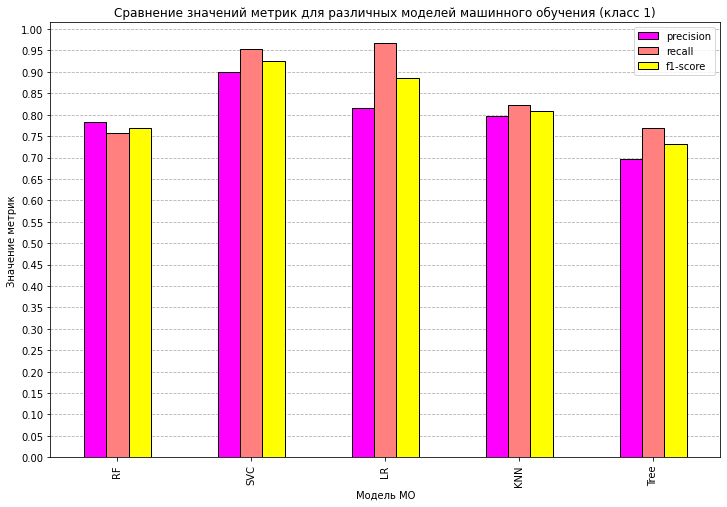

In [103]:
ax = class_1_metrics_df.iloc[:, :-1].plot(kind='bar', 
                                     figsize=(12, 8), colormap='spring', 
                                     ec='k', zorder=2,
                                     yticks=np.arange(0, 1.05, 0.05),
                                     ylabel='Значение метрик', xlabel='Модель МО',
                                     title='Сравнение значений метрик для различных моделей машинного обучения (класс 1)',
                                     );
ax.grid("on", axis="y", ls='--')

По графикам видно, что SVC показывает себя лучше остальных.

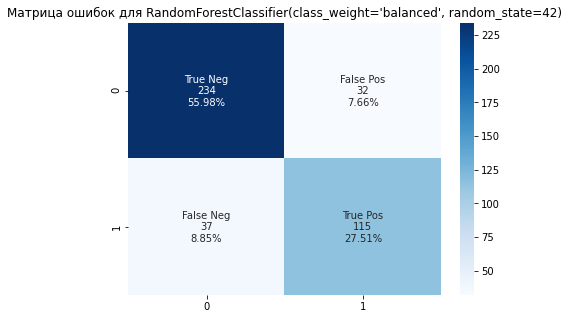

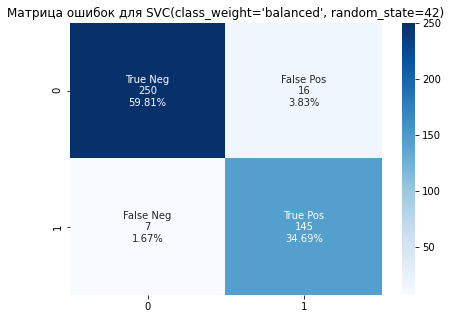

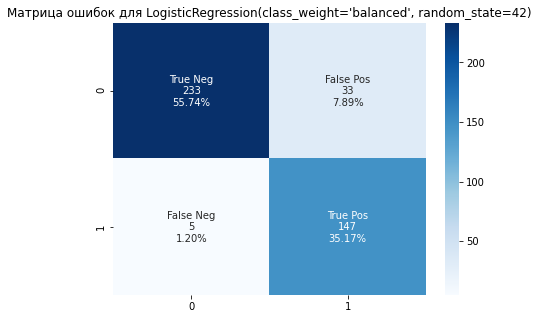

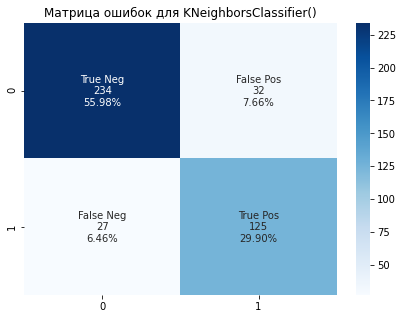

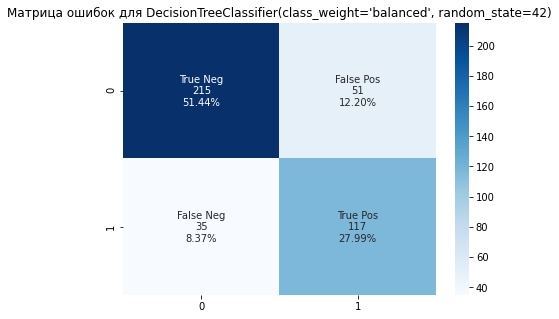

In [104]:
for clf in classifiers:
    make_cf_matrix(transformer, clf)

In [105]:
from sklearn import set_config
set_config(display='diagram')

**Вывод**: SVC дает наилучшие результаты (исходя из F1-score), поэтому будем использовать его.

# Подбираем лучшие гиперпараметры SVC

## Подбор гиперпараметров

In [106]:
svc_model = Pipeline(steps=[('preprocessor', transformer),
                      ('classifier', svc)])

In [107]:
# Команда позволяет увидеть доступные параметры для тюнинга
# list(svc_model.get_params().keys())

In [108]:
svc_params = {}
svc_params['preprocessor__num_preprocessing__imputer__n_neighbors'] = [2, 5, 7, 10]
svc_params['classifier__gamma'] = [0.1, 1, 10, 100]
svc_params['classifier__C'] = [0.1, 1, 10, 100]
svc_params['classifier__max_iter']: [5]

In [109]:
import time

In [110]:
# t0 = time.time()
# svc_search = GridSearchCV(svc_model, svc_params, cv=5, n_jobs=-1, scoring='f1', verbose=3)
# svc_search.fit(X_train, y_train);
# t1 = time.time()

In [111]:
# print(t1-t0)

In [112]:
# svc_search.best_score_

In [113]:
# svc_search.best_params_

In [114]:
{'classifier__C': 1,
 'classifier__gamma': 0.1,
 'preprocessor__num_preprocessing__imputer__n_neighbors': 7}

{'classifier__C': 1,
 'classifier__gamma': 0.1,
 'preprocessor__num_preprocessing__imputer__n_neighbors': 7}

## Оценка модели с новыми гиперпараметрами

In [115]:
kimp = KNNImputer(n_neighbors=7)
best_SVC = SVC(C=1, gamma=0.1, random_state=42, class_weight='balanced')

In [116]:
best_model = Pipeline([
    ('transformer', transformer),
    ('clf', best_SVC)
])

best_model.fit(X_train, y_train)
print(classification_report(y_test, best_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       266
           1       0.91      0.95      0.93       152

    accuracy                           0.95       418
   macro avg       0.94      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



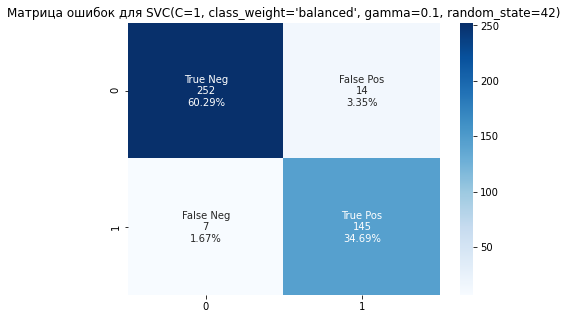

In [117]:
make_cf_matrix(transformer, best_SVC);

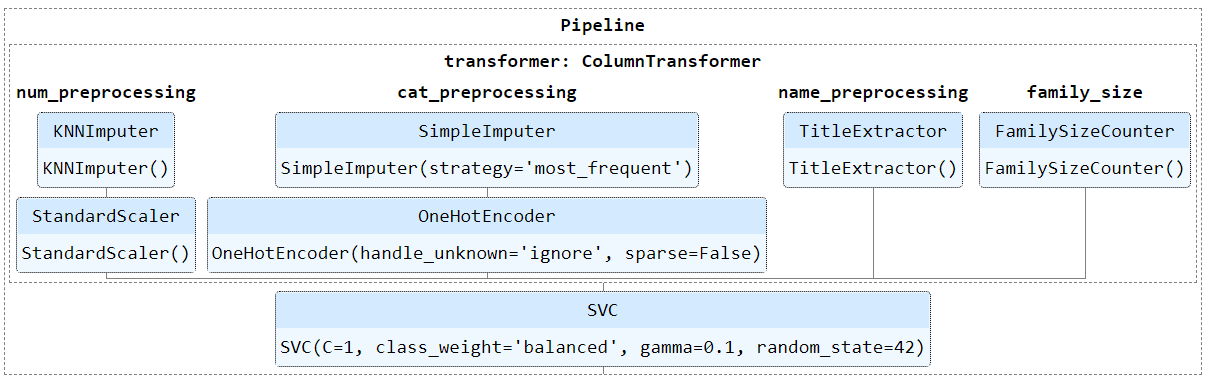

Благодаря подбору гиперпараметров удалось получить небольшую прибавку к метрикам. <br>
Таким образом, была получена модель машинного обучения, состоящая из пайплайна предобработки и классификатора SVC.